In [1]:
from helper import create_batches
import tensorflow as tf
import numpy as np
import shelve
import joblib
import random
import time
import math
import matplotlib.pyplot as plt

#Cuz the file is inside 'code' directory
mount_point = "../shelved_data/"

with shelve.open(mount_point+'IAM_Data') as shelf:
    vocabulary = shelf['chars']
    list_of_images = shelf['list_of_images']
    image_labels = shelf['image_labels']
    
image_arrays = joblib.load(mount_point+'image_arrays')

#List_images ko sort karo
# list_of_images.sort()

#Convert vocabulary to list
vocabulary = list(vocabulary)
#Sort so as to have the same ordering every time..
vocabulary.sort()
vocabulary.append("<Blank>")

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


## Test Parameters

In [2]:
img_height = 104
img_width = 688
vocab_size = len(vocabulary)

conv_out_height, conv_out_width = (int(math.ceil(img_height/(2**3 * 3))),int(math.ceil(img_width/(2**3 * 3))))

#Number of time_steps to unroll for..
seq_len = conv_out_height * conv_out_width

training_list = list_of_images
batch_size = len(training_list)

In [3]:
batches_x,batches_y = create_batches(batch_size,training_list,image_arrays,image_labels,vocabulary)
print(len(batches_x),len(batches_y))

1 1


## Predict using Model

In [4]:
resume_epoch = 1725

In [5]:
outputs = []

In [6]:
with tf.Session() as sess:
    # Load the graph
    saver = tf.train.import_meta_graph('../model/200_5_Lines_RNN_'+str(resume_epoch)+'.meta')
    # Restore the weights and biases
    saver.restore(sess, '../model/200_5_Lines_RNN_'+str(resume_epoch))

    #Extract the placeholders
    inputs = sess.graph.get_tensor_by_name('Placeholder:0')
    target_indices = sess.graph.get_tensor_by_name('targets/indices:0')
    target_values = sess.graph.get_tensor_by_name('targets/values:0')
    target_shape = sess.graph.get_tensor_by_name('targets/shape:0')
    
    time_steps = sess.graph.get_tensor_by_name('Placeholder_1:0')
    dropout_lstm = sess.graph.get_tensor_by_name('Placeholder_2:0')
    dropout_fc = sess.graph.get_tensor_by_name('Placeholder_3:0')
    
    decoded = sess.graph.get_tensor_by_name('CTCGreedyDecoder:1')
    cost = sess.graph.get_tensor_by_name('Mean:0')
    label_error_rate = sess.graph.get_tensor_by_name('Mean_1:0')

    start_time = time.time()

    for b in range(len(batches_x)):
        feed = {inputs:batches_x[b].transpose([2,0,1]),target_indices:batches_y[b][0],target_values:batches_y[b][1],target_shape:batches_y[b][2],
                time_steps:np.array([seq_len]*batch_size),dropout_lstm:1.0, dropout_fc:1.0,
               }

        cost_val,ler_val,d = sess.run([cost,label_error_rate,decoded], feed_dict=feed)

        outputs.append(d)

        end_time = time.time()   
    
        time_taken = end_time - start_time

#         print("{:.6f},{:.2f},{:.2f}\n".format(cost_val,ler_val,time_taken))

INFO:tensorflow:Restoring parameters from ../model/200_5_Lines_RNN_1725
34.490013,0.33,1.64



In [7]:
len(outputs)

1

In [8]:
plt.imsave('1.png',image_arrays[training_list[0]],cmap='gray',format='png')
plt.imsave('2.png',image_arrays[training_list[1]],cmap='gray',format='png')
plt.imsave('3.png',image_arrays[training_list[2]],cmap='gray',format='png')
plt.imsave('4.png',image_arrays[training_list[3]],cmap='gray',format='png')
plt.imsave('5.png',image_arrays[training_list[4]],cmap='gray',format='png')

In [9]:
content = "".join([vocabulary[char] for char in outputs[0]])

In [10]:
content

'obvosy thirty . ohen ought  his inheited desue to sub the ma  hed he wou hae to lee the bar and the  in the lou or run to hom . eed ed hisembrast and r  the re . Te lned yorlf , she id with moity . " It \'s m busins . \'l tel ou more . re going to  ve comnd of e . Am I right ? " Wh hod o ? " ie bird . Other hl ? John nod . " On me."ley sho his head ." Al d for b is Lorip , " he si . Epne acount. Yoe aried man with culie of i . t o ing your susance n colte sSet \'em,g ! " " ok ! he went on erestly . You ore going to wi up ericles in some wy or r , are you ?  What ithere to wt  ? said Baley  The e fory theresunes in '

In [11]:
# target = "".join(image_labels[training_list[i]] for i in range(batch_size))

In [12]:
# target

In [13]:
# print(image_labels[training_list[4]])

In [14]:
training_list[0]

'Lines/n04/n04-068/n04-068-01.png'

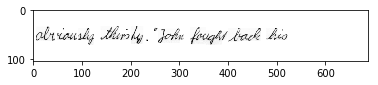

In [15]:
plt.imshow(batches_x[0].transpose([2,0,1])[0],cmap='gray')

In [16]:
# output = str(list(map(dct.get, list(prob_d.values))))

In [17]:
# #Evaluate the Output
# content = []
# for k in range(len(out1)):
#     content.append(''.join([vocabulary[x] for x in out1[k]]))
#     print("\n".join(content))

In [18]:
# vocabulary[]

In [19]:
# out1[0]
# for x in out1[0]:
#     print(x)

In [20]:
# out1[100]

In [21]:
#For Outputs...
# Output of CTCGreedyDecoder
# [<tf.Tensor 'CTCGreedyDecoder:0' shape=(?, 2) dtype=int64>,
#  <tf.Tensor 'CTCGreedyDecoder:1' shape=(?,) dtype=int64>,
#  <tf.Tensor 'CTCGreedyDecoder:2' shape=(2,) dtype=int64>,
#  <tf.Tensor 'CTCGreedyDecoder:3' shape=(32, 1) dtype=float32>]